### Midterm Project DATA 119 Winter Quarter
Purpose: Analyze a set of data about teachers with categories from Rate My Professor

In [150]:
# HIDDEN
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

In [176]:
#Read the data into a dataframe called prof_df:
prof_df = pd.read_csv("RateMyProfessor_Sample data.csv")
prof_df.head()

,professor_name,school_name,department_name,local_name,state_name,year_since_first_review,star_rating,take_again,diff_index,tag_professor,...,lots_of_homework,accessible_outside_class,lecture_heavy,extra_credit,graded_by_few_things,group_projects,test_heavy,so_many_papers,beware_of_pop_quizzes,IsCourseOnline
0,Leslie Looney,University Of Illinois at Urbana-Champaign,Astronomy department,Champaign\xe2\x80\x93Urbana,IL,11,4.7,NaN,2.0,Hilarious (2) GROUP PROJECTS (2) Gives good ...,...,0,0,0,0,0,1,0,0,0,0
1,Leslie Looney,University Of Illinois at Urbana-Champaign,Astronomy department,Champaign\xe2\x80\x93Urbana,IL,11,4.7,NaN,2.0,Hilarious (2) GROUP PROJECTS (2) Gives good ...,...,0,0,0,0,0,1,0,0,0,0
2,Leslie Looney,University Of Illinois at Urbana-Champaign,Astronomy department,Champaign\xe2\x80\x93Urbana,IL,11,4.7,NaN,2.0,Hilarious (2) GROUP PROJECTS (2) Gives good ...,...,0,0,0,0,0,1,0,0,0,0
3,Leslie Looney,University Of Illinois at Urbana-Champaign,Astronomy department,Champaign\xe2\x80\x93Urbana,IL,11,4.7,NaN,2.0,Hilarious (2) GROUP PROJECTS (2) Gives good ...,...,0,0,0,0,0,1,0,0,0,0
4,Leslie Looney,University Of Illinois at Urbana-Champaign,Astronomy department,Champaign\xe2\x80\x93Urbana,IL,11,4.7,NaN,2.0,Hilarious (2) GROUP PROJECTS (2) Gives good ...,...,0,0,0,0,0,1,0,0,0,0


In [226]:
# names of different departments:
dep = prof_df.groupby('department_name').mean().reset_index()[['department_name','student_star','student_difficult']]

#drop the 'Not Specified department' row:
dep.loc[dep['department_name']=='Not Specified department']
dep = dep.drop(75)
dep = dep.reset_index()
dep.head()

,index,department_name,student_star,student_difficult
0,0,ASL & Deaf Studies department,4.222222,3.277778
1,1,Accounting & Finance department,4.400000,2.450000
2,2,Accounting department,3.513258,3.488636
3,3,African Studies department,1.736842,3.631579
4,4,Agriculture department,4.750000,3.500000


In [228]:
#List of All Department Names to parse
list(dep.department_name)

['ASL & Deaf Studies department',
 'Accounting & Finance department',
 'Accounting department',
 'African Studies department',
 'Agriculture department',
 'Anatomy department',
 'Anthropology department',
 'Architecture department',
 'Art History department',
 'Art department',
 'Asian American Studies department',
 'Astronomy department',
 'Automotive Technology department',
 'Aviation department',
 'Biochemistry department',
 'Biology department',
 'Business department',
 'Chemistry & Biochemistry department',
 'Chemistry department',
 'Chicano Studies department',
 'Childrens Literature department',
 'Civil Engineering department',
 'Classics department',
 'Communication department',
 'Comparative Literature department',
 'Computer Engineering department',
 'Computer Information Systems department',
 'Computer Science department',
 'Criminal Justice department',
 'Culinary Arts department',
 'Design department',
 'Earth Science department',
 'Economics department',
 'Education depar

# Manually Identify STEM departments
Accounting & Finance Department, 
Accounting department, 
Anatomy department, 
Astronomy department, 
Automotive Technology department,
Aviation department,
Biochemistry department,
Biology department,
Chemistry & Biochemistry department,
Chemistry department,
Computer Engineering department,
Computer Information Systems department,
Computer Science department,
Earth Science department,
Electrical Engineering department,
Electrical Technology department,
Engineering department,
Environment department,
Geology department,
Health Science department,
Kinesiology department,
MacRomolecular Science & Eng department,
Materials Science department,
Mathematics department,
Mechanical Engineering department,
Medicine department,
Natural Sciences department,
Nutrition department,
Pharmacology department,
Pharmacy department,
Physics department,
Psychology department,
Science department,
Statistics department,

In [231]:
#read STEM department names from stem.csv into a dataframe
stem_df = pd.read_csv("stem.csv")
stem_df.head()

,stem_departments
0,Accounting & Finance department
1,Accounting department
2,Anatomy department
3,Astronomy department
4,Automotive Technology department


In [230]:
#Create list of STEM departments
stem_list = list(stem_df['stem_departments'])
stem_list

['Accounting & Finance department',
 'Accounting department',
 'Anatomy department',
 'Astronomy department',
 'Automotive Technology department',
 'Aviation department',
 'Biochemistry department',
 'Biology department',
 'Chemistry & Biochemistry department',
 'Chemistry department',
 'Computer Engineering department',
 'Computer Information Systems department',
 'Computer Science department',
 'Earth Science department',
 'Electrical Engineering department',
 'Electrical Technology department',
 'Engineering department',
 'Environment department',
 'Geology department',
 'Health Science department',
 'Kinesiology department',
 'MacRomolecular Science & Eng department',
 'Materials Science department',
 'Mathematics department',
 'Mechanical Engineering department',
 'Medicine department',
 'Natural Sciences department',
 'Nutrition department',
 'Pharmacology department',
 'Pharmacy department',
 'Physics department',
 'Psychology department',
 'Science department',
 'Statistics dep

In [233]:
#Find number of unique departments (not including Not Specified)
num_rows = dep.shape[0]
num_rows

100

## Graphs of Departments Star Ratings and Difficulty

In [237]:
#Assign dummy 'stem' variable to each department in the data table using stem_list:
dep['stem'] = np.zeros(len(dep['department_name']))
for i in range(num_rows):
    if dep['department_name'][i] in stem_list:
        dep['stem'][i] = 1

In [88]:
#Number of Stem departments
sum(dep['stem'])

34.0

In [89]:
#create separate dataframes for stem and non-stem classes
stem_box = dep[dep['stem']==1]
not_stem_box = dep[dep['stem']==0]

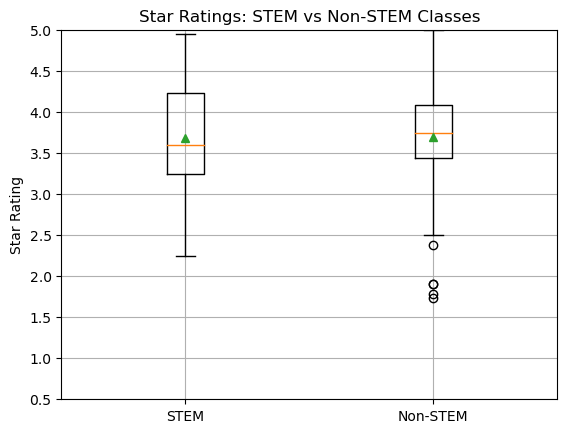

In [238]:
#plot boxplots for the Star Ratings of STEM and Non-STEM departments
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

fig1, ax1 = plots.subplots()
ax1.set_title('Star Ratings: STEM vs Non-STEM Classes')

plt.ylim(0.5,5)

ax1.boxplot([stem_box.student_star,not_stem_box.student_star],labels = ['STEM','Non-STEM'], showmeans=True)
plots.ylabel('Star Rating')
plots.grid()

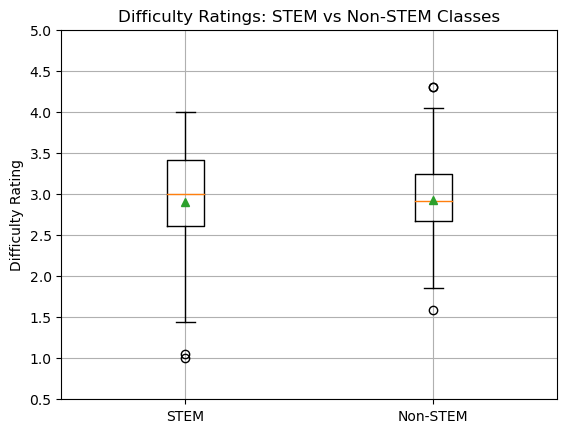

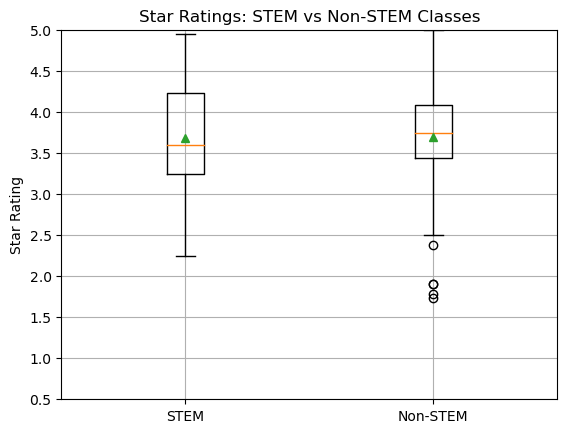

In [313]:
#plot boxplots for the Difficulty Ratings of STEM and Non-STEM departments

fig1, ax1 = plots.subplots(1,1)
ax1.set_title('Difficulty Ratings: STEM vs Non-STEM Classes')

plt.ylim(0.5,5)

ax1.boxplot([stem_box.student_difficult,not_stem_box.student_difficult],labels = ['STEM','Non-STEM'], showmeans =True)
plots.ylabel('Difficulty Rating')
plots.grid()

#Plot 2:
fig1, ax1 = plots.subplots()
ax1.set_title('Star Ratings: STEM vs Non-STEM Classes')

plt.ylim(0.5,5)

ax1.boxplot([stem_box.student_star,not_stem_box.student_star],labels = ['STEM','Non-STEM'], showmeans=True)
plots.ylabel('Star Rating')
plots.grid()

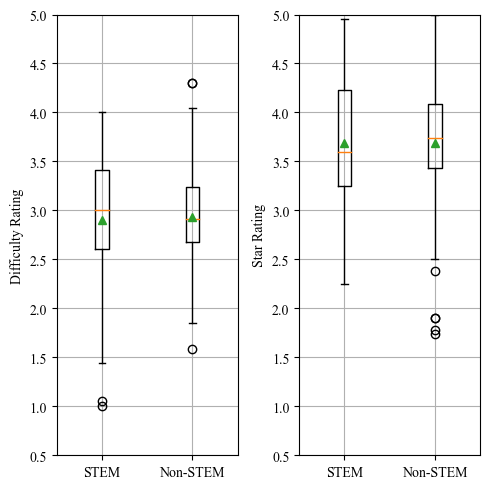

In [347]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)
#plots.rcParams['figure.dpi'] = 600
#plots.rcParams['savefig.dpi'] = 600
plots.rcParams['font.family'] = "Times New Roman"

csfont = {'fontname':'Times New Roman'}

plots.figure(figsize=(5,5),dpi=100)
plots.subplot(1,2,1)
plots.boxplot([stem_box.student_difficult,not_stem_box.student_difficult],labels = ['STEM','Non-STEM'], showmeans =True)
plots.ylabel('Difficulty Rating', **csfont)
plots.grid()
plt.ylim(0.5,5)

plots.subplot(1,2,2)
plots.boxplot([stem_box.student_star,not_stem_box.student_star],labels = ['STEM','Non-STEM'], showmeans=True)
plots.ylabel('Star Rating', **csfont)
plots.grid()
plt.ylim(0.5,5)
#plots.suptitle('Difficulty and Star Rating of STEM vs Non-STEM Departments', **csfont, fontweight='bold')

plots.tight_layout()

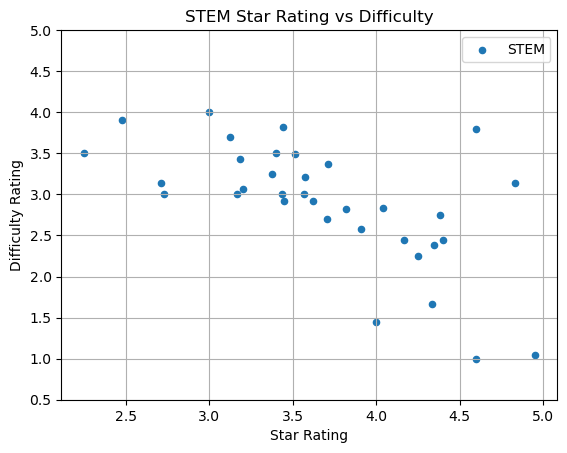

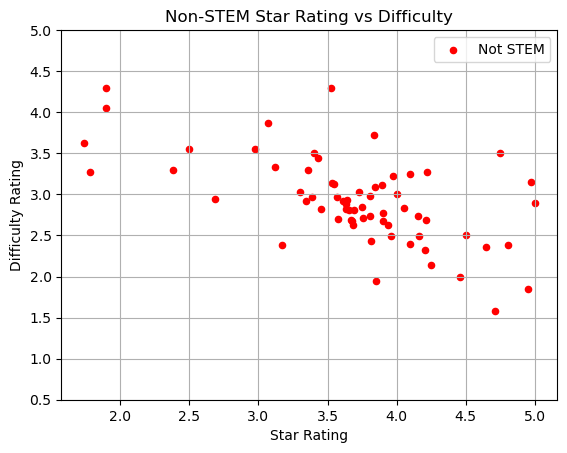

In [249]:
# Seperate scatter plots for Stem and Non-Stem Classes after grouping by department
stem_box.plot.scatter('student_star','student_difficult', label = 'STEM', title = 'STEM Star Rating vs Difficulty')
plots.xlabel('Star Rating')
plots.ylabel('Difficulty Rating')
plots.ylim(0.5,5)
plots.grid()
not_stem_box.plot.scatter('student_star','student_difficult', label = 'Not STEM', color = 'red', title = 'Non-STEM Star Rating vs Difficulty')
plots.xlabel('Star Rating')
plots.ylabel('Difficulty Rating')
plots.ylim(0.5,5)
plots.grid()

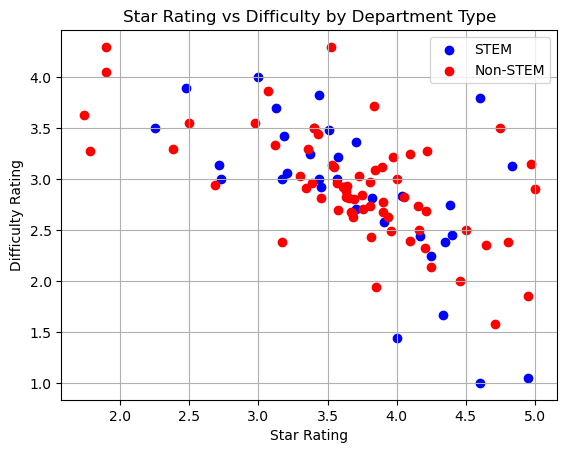

In [256]:
# Superimposed scatter plots for Stem Vs Non-Stem after grouping by department

plots.scatter(stem_box.student_star, stem_box.student_difficult, label = 'STEM', color = 'blue')
plots.scatter(not_stem_box.student_star, not_stem_box.student_difficult, label = 'Non-STEM', color = 'red')
plots.legend()
plots.xlabel('Star Rating')
plots.ylabel('Difficulty Rating')
plots.title('Star Rating vs Difficulty by Department Type')
plots.grid()

### Finding Parameters of Departments:

In [257]:
#Sort by student difficulty ratings to find the "hardest" and "easiest" departments
dep.sort_values('student_difficult')

,index,department_name,student_star,student_difficult,stem
12,12,Automotive Technology department,4.600000,1.000000,1.0
26,26,Computer Information Systems department,4.950000,1.050000,1.0
13,13,Aviation department,4.000000,1.444444,1.0
93,94,Speech department,4.708333,1.583333,0.0
78,79,Pharmacy department,4.333333,1.666667,1.0
...,...,...,...,...,...
17,17,Chemistry & Biochemistry department,2.475000,3.900000,1.0
35,35,Electrical Technology department,3.000000,4.000000,1.0
10,10,Asian American Studies department,1.900000,4.050000,0.0
88,89,Russian department,3.525000,4.300000,0.0


In [258]:
#Find means of star rating and difficulty after grouping by STEM vs Non-STEM
dep.groupby('stem').mean()

,index,student_star,student_difficult
stem,,,
0.0,52.227273,3.689659,2.929437
1.0,44.941176,3.684562,2.898552


In [190]:
#Repeat for the Medians
dep.groupby('stem').median()

,index,student_star,student_difficult
stem,,,
0.0,52.5,3.740274,2.909302
1.0,38.0,3.597329,3.000000


### Confidence Intervals for Department Means and Medians:

In [270]:
# confidence interval calculator for medians of star ratings
# assign stem value to each student row based on department

smaller = prof_df[['department_name','student_star','student_difficult']]
smaller['stem'] = np.zeros(len(smaller['student_star']))
for i in range(len(smaller['student_star'])):
        if smaller['department_name'][i] == 'Not Specified department':
            smaller['stem'][i] = 2
        elif smaller['department_name'][i] in stem_list:
            smaller['stem'][i] = 1
smaller = smaller[smaller['stem']<2]

In [274]:
smaller.shape

(19942, 4)

In [296]:
#Number of student ratings given for STEM and Non-STEM classes:
smaller.groupby('stem').count()

,department_name,student_star,student_difficult
stem,,,
0.0,12491,12486,12486
1.0,7451,7451,7451


In [294]:
# Sample and get array of medians
stem_star_medians = np.array([])
not_stem_star_medians = np.array([])
stem_diff_medians = np.array([])
not_stem_diff_medians = np.array([])
for i in range(1000):
    sample = smaller.sample(5000)
    info = sample.groupby('department_name').mean().groupby('stem').median()
    stem_star_medians = np.append(stem_star_medians, info['student_star'][1])
    not_stem_star_medians = np.append(not_stem_star_medians,info['student_star'][0])
    stem_diff_medians = np.append(stem_diff_medians, info['student_difficult'][1])
    not_stem_diff_medians = np.append(not_stem_diff_medians, info['student_difficult'][0])

In [295]:
#print 95% confidence intervals for medians
print([np.percentile(stem_star_medians,2.5),np.percentile(stem_star_medians,97.5)])
print([np.percentile(not_stem_star_medians,2.5),np.percentile(not_stem_star_medians,97.5)])
print([np.percentile(stem_diff_medians,2.5),np.percentile(stem_diff_medians,97.5)])
print([np.percentile(not_stem_diff_medians,2.5),np.percentile(not_stem_diff_medians,97.5)])

[3.5, 3.8767327841213586]
[3.634587041156841, 3.8193304962426686]
[2.875, 3.1666666666666665]
[2.8190881534774714, 3.0]


In [297]:
# Sample and get array of means:
stem_star_means = np.array([])
not_stem_star_means = np.array([])
stem_diff_means = np.array([])
not_stem_diff_means = np.array([])
for i in range(1000):
    sample = smaller.sample(5000)
    info = sample.groupby('department_name').mean().groupby('stem').mean()
    stem_star_means = np.append(stem_star_means, info['student_star'][1])
    not_stem_star_means = np.append(not_stem_star_means,info['student_star'][0])
    stem_diff_means = np.append(stem_diff_means, info['student_difficult'][1])
    not_stem_diff_means = np.append(not_stem_diff_means, info['student_difficult'][0])

In [298]:
#print 95% confidence intervals for means:
print([np.percentile(stem_star_means,2.5),np.percentile(stem_star_means,97.5)])
print([np.percentile(not_stem_star_means,2.5),np.percentile(not_stem_star_means,97.5)])
print([np.percentile(stem_diff_means,2.5),np.percentile(stem_diff_means,97.5)])
print([np.percentile(not_stem_diff_means,2.5),np.percentile(not_stem_diff_means,97.5)])

[3.510266753159941, 3.8653098163088093]
[3.5760880725709288, 3.776474673464223]
[2.7378607778269073, 3.055920732414368]
[2.8397042226008087, 3.0215469559404684]


In [304]:
#Number of universities in Study:
list(prof_df.groupby('school_name').count().reset_index().school_name)

['Abilene Christian University',
 'Acadia University',
 'Albright College',
 'Alma College',
 'Alvernia University',
 'Alvin Community College',
 'American University',
 'Amherst College',
 'Anderson University',
 'Angelina College',
 'Angelo State University',
 'Anne Arundel Community College (all campuses)',
 'Appalachian State University',
 'Arizona State University',
 'Arkansas State University',
 'Art Institute of California - Orange County',
 'Ashland University',
 'Assiniboine Community College',
 'Assumption College',
 'Austin Community College',
 'Austin Peay State University',
 'Averett University',
 'Ball State University',
 'Baruch College',
 'Bentley University',
 'Bergen Community College',
 'Berry College',
 'Bethel College',
 'Biola University',
 'Bluegrass Community & Technical College',
 'Boston Architectural College',
 'Boston University',
 'Bowdoin College',
 'Bowling Green State University',
 'Brandon University',
 'Bridgewater State University',
 'Brigham Young Un

In [305]:
prof_df[prof_df['school_name']=='University of Chicago']

,professor_name,school_name,department_name,local_name,state_name,year_since_first_review,star_rating,take_again,diff_index,tag_professor,...,lots_of_homework,accessible_outside_class,lecture_heavy,extra_credit,graded_by_few_things,group_projects,test_heavy,so_many_papers,beware_of_pop_quizzes,IsCourseOnline
3576,William Goldstein,University of Chicago,Psychology department,Chicago,IL,4,3.8,NaN,2.4,NaN,...,0,0,0,0,0,0,0,0,0,0
3577,William Goldstein,University of Chicago,Psychology department,Chicago,IL,4,3.8,NaN,2.4,NaN,...,0,0,0,0,0,0,0,0,0,0
3578,William Goldstein,University of Chicago,Psychology department,Chicago,IL,4,3.8,NaN,2.4,NaN,...,0,0,0,0,0,0,0,0,0,0
3579,William Goldstein,University of Chicago,Psychology department,Chicago,IL,4,3.8,NaN,2.4,NaN,...,0,0,0,0,0,0,0,0,0,0
3580,William Goldstein,University of Chicago,Psychology department,Chicago,IL,4,3.8,NaN,2.4,NaN,...,0,0,0,0,0,0,0,0,0,0
